## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
reviews2 = reviews.copy()

reviews2.drop(columns=['App', 'Size', 'Last Updated', 'Current Ver',  'Android Ver' ],
             inplace=True)

reviews2 = reviews2.dropna()

In [4]:
len(reviews2.Category.unique())

33

In [5]:
reviews2.isnull().sum()

Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [6]:
reviews2['Rating > 4.5'] = np.where(reviews2['Rating'] > 4.5, 1, 0)

In [7]:
reviews2.drop('Rating', axis=1, inplace=True)

In [8]:
reviews2

,Category,Reviews,Installs,Type,Price,Content Rating,Genres,Rating > 4.5
0,ART_AND_DESIGN,159,"10,000+",Free,0,Everyone,Art & Design,0
1,ART_AND_DESIGN,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,87510,"5,000,000+",Free,0,Everyone,Art & Design,1
3,ART_AND_DESIGN,215644,"50,000,000+",Free,0,Teen,Art & Design,0
4,ART_AND_DESIGN,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,0
...,...,...,...,...,...,...,...,...
10834,FAMILY,7,500+,Free,0,Everyone,Education,0
10836,FAMILY,38,"5,000+",Free,0,Everyone,Education,0
10837,FAMILY,4,100+,Free,0,Everyone,Education,1
10839,BOOKS_AND_REFERENCE,114,"1,000+",Free,0,Mature 17+,Books & Reference,0


In [9]:
reviews2.dtypes

Category          object
Reviews           object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Rating > 4.5       int64
dtype: object

In [10]:
reviews2['Price'] = pd.to_numeric(reviews2['Price'].str.strip('$'))

In [11]:
reviews2['Reviews'] = pd.to_numeric(reviews2['Reviews'])


In [12]:
from category_encoders import LeaveOneOutEncoder

from sklearn.model_selection import train_test_split

encoder = LeaveOneOutEncoder()

In [13]:
y = reviews2['Rating > 4.5']

X = reviews2.drop('Rating > 4.5', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

encoder.fit(X_train, y_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_train_encoded

,Category,Reviews,Installs,Type,Price,Content Rating,Genres
4095,0.350993,85842,0.146805,0.196872,0.0,0.214082,0.350993
4867,0.348739,2105,0.162486,0.196872,0.0,0.214082,0.348739
8750,0.076336,6,0.325301,0.196872,0.0,0.214082,0.076336
3108,0.111111,216388,0.171634,0.196872,0.0,0.214082,0.111702
3267,0.167797,18513,0.171634,0.196872,0.0,0.214082,0.167797
...,...,...,...,...,...,...,...
8159,0.167797,2,0.818182,0.196872,0.0,0.214082,0.167797
9138,0.208633,580,0.159420,0.196872,0.0,0.214082,0.170264
6358,0.247059,2448,0.162486,0.196872,0.0,0.214082,0.247059
6524,0.153846,50,0.184438,0.196872,0.0,0.214082,0.153846


In [15]:
from sklearn.ensemble import RandomForestClassifier

forrest = RandomForestClassifier()
forrest.fit(X_train_encoded, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_test_pred = forrest.predict(X_test_encoded)

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1504
           1       0.51      0.41      0.45       370

    accuracy                           0.81      1874
   macro avg       0.69      0.66      0.67      1874
weighted avg       0.79      0.81      0.80      1874



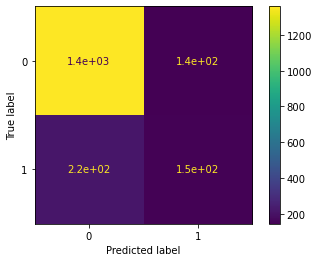

In [17]:
plot_confusion_matrix(forrest, X_test_encoded, y_test)

In [21]:
from sklearn.model_selection import GridSearchCV

forrest = RandomForestClassifier(n_estimators=100)

params = {'max_depth':[5, 10, 50], 'min_samples_split': [5,10,50]}

grid = GridSearchCV(forrest, params, cv=5)

grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [26]:
grid_pred = grid.best_estimator_.predict(X_test_encoded)

print(
    f'Params:\n'
    f'max_depth: {grid.best_estimator_.max_depth}\n'
    f'min_samples_split: {grid.best_estimator_.min_samples_split}\n'
)

print(classification_report(y_test, grid_pred))



Params:
max_depth: 50
min_samples_split: 10

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1504
           1       0.60      0.32      0.41       370

    accuracy                           0.82      1874
   macro avg       0.72      0.63      0.65      1874
weighted avg       0.80      0.82      0.80      1874



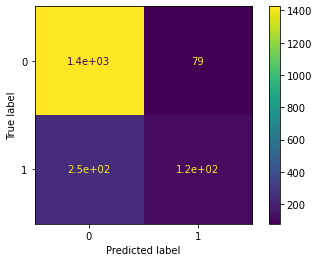

In [27]:
plot_confusion_matrix(grid.best_estimator_, X_test_encoded, y_test)